In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
url= "brain_stroke.csv"

In [5]:
brain = pd.read_csv(url)
brain.head() 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
mapping = {'Male': 0, 'Female': 1, 'Yes': 1, 'No': 0, 'Unknown': 0, 'never smoked' : 1, 'formerly smoked' : 2, 'smokes': 3}
brain = brain.replace({'gender': mapping, 'ever_married' : mapping, 'smoking_status': mapping})
brain_num = brain.drop(["work_type", "Residence_type"], axis=1)
brain_num.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,228.69,36.6,2,1
1,0,80.0,0,1,1,105.92,32.5,1,1
2,1,49.0,0,0,1,171.23,34.4,3,1
3,1,79.0,1,0,1,174.12,24.0,1,1
4,0,81.0,0,0,1,186.21,29.0,2,1


In [7]:
corr_matrix = brain_num.corr()
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.246478
heart_disease        0.134610
avg_glucose_level    0.133227
hypertension         0.131965
ever_married         0.108398
bmi                  0.056926
smoking_status       0.054793
gender              -0.008870
Name: stroke, dtype: float64

In [8]:
X = brain_num.iloc[:,0:8]
y = brain_num.iloc[:,-1]
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(5,'Score'))

               Specs        Score
1                age  3578.674662
5  avg_glucose_level  1695.196533
3      heart_disease    85.272411
2       hypertension    78.401543
6                bmi    26.111232


[0.02376579 0.27390618 0.0238311  0.02048055 0.01591921 0.29751658
 0.27022039 0.0743602 ]


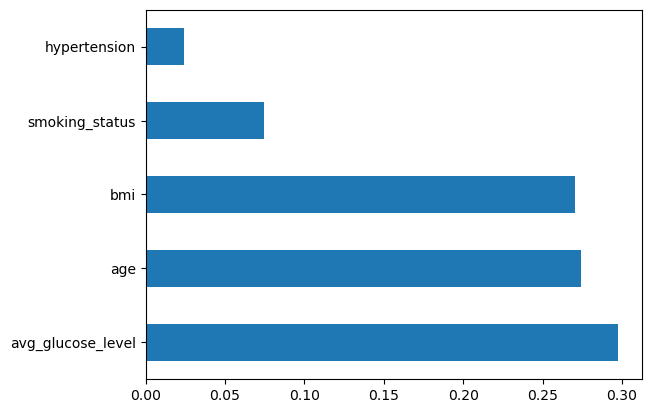

In [9]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [10]:
brain_num["stroke_per_age"]=brain_num["stroke"]/brain_num["age"]
brain_num["stroke_per_glucose"]=brain_num["stroke"]/brain_num["avg_glucose_level"]
# brain_num["stroke_per_heart_disease"]=brain_num["stroke"]/brain_num["heart_disease"]
# brain_num["stroke_per_hypertension"]=brain_num["stroke"]/brain_num["hypertension"]
cols_at_end = ['stroke']
brain_num = brain_num[[c for c in brain_num if c not in cols_at_end] 
                        + [c for c in cols_at_end if c in brain_num]]
brain_num.head()


,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke_per_age,stroke_per_glucose,stroke
0,0,67.0,0,1,1,228.69,36.6,2,0.014925,0.004373,1
1,0,80.0,0,1,1,105.92,32.5,1,0.012500,0.009441,1
2,1,49.0,0,0,1,171.23,34.4,3,0.020408,0.005840,1
3,1,79.0,1,0,1,174.12,24.0,1,0.012658,0.005743,1
4,0,81.0,0,0,1,186.21,29.0,2,0.012346,0.005370,1


In [11]:
corr_matrix = brain_num.corr()
corr_matrix["stroke"].sort_values(ascending=False)

stroke                1.000000
stroke_per_glucose    0.916501
stroke_per_age        0.354299
age                   0.246478
heart_disease         0.134610
avg_glucose_level     0.133227
hypertension          0.131965
ever_married          0.108398
bmi                   0.056926
smoking_status        0.054793
gender               -0.008870
Name: stroke, dtype: float64

In [14]:
X = brain_num.iloc[:,0:10]
y = brain_num.iloc[:,-1]
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

                Specs        Score
1                 age  3578.674662
5   avg_glucose_level  1695.196533
8      stroke_per_age    86.965392
3       heart_disease    85.272411
2        hypertension    78.401543
9  stroke_per_glucose    44.062533
6                 bmi    26.111232
4        ever_married    19.987006
7      smoking_status    13.437426
0              gender     0.163171


[4.32392060e-04 2.33114202e-02 4.22270139e-03 7.22582519e-03
 2.41426249e-03 5.10418599e-03 1.17967298e-03 7.49551080e-04
 4.05377418e-01 5.49982571e-01]


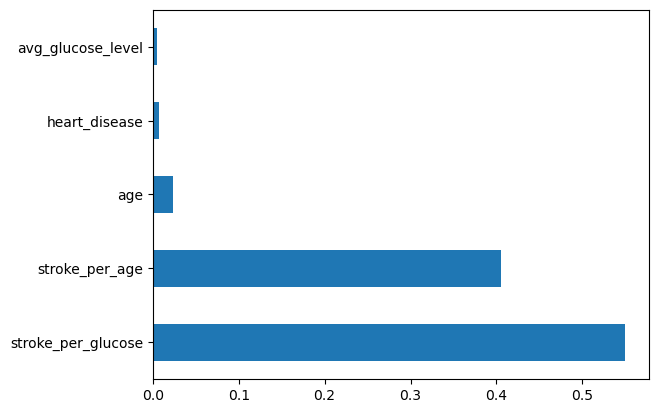

In [15]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()